In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [2]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.43,0.44,0.01):   
    
    h1 = h
    h2 =0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-10
    MPS.max_bond = 20
    MPS.construct_from_tensor_list([B,B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,max_bond=20)
    MPS_power.update(300)
    
    
    T3 = np.zeros([1,1,4,4])
    T3[0,0,:,:] = np.kron(X,X)


    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3,T3])
    
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    
    
    
print(MPS.chi)
print(lam4)

[11 13]
(0.9848227506631344+9.133641365880124e-18j)


In [3]:


MPS_two_site = iMPS.MPS_twosite_update2(MPS,MPO,20)
    
MPS_two_site.svd_threshold=1e-10
MPS_two_site.MPS2r = copy.deepcopy(MPS)
MPS_two_site.init_MPS2()
    
    
MPS_two_site.init_env()

#MPS_two_site.update_MPS2(100)


In [4]:
MPS_two_site.diff_list

[-1, 0.03802407583383788, 0.00044799665040364797, 6.240697214720536e-07]

In [4]:
#MPS_two_site.update_MPS2(1)
s0 =np.diag(MPS_two_site.MPS2r.s[0])
s1 =np.diag(MPS_two_site.MPS2r.s[1])

T1 = funcs.row_contract33(funcs.row_contract32(MPS_two_site.MPS2l.B[0],s1),MPS_two_site.MPS2r.B[1])
T2 = funcs.row_contract33(funcs.row_contract23(s0,MPS_two_site.MPS2r.B[0]),MPS_two_site.MPS2r.B[1])

print(np.linalg.norm(T1-T2))
T3 = MPS_two_site.new_tensor(0).conj()

print(np.linalg.norm(T1/T1[0,0,0,0]-T3/T3[0,0,0,0])/np.linalg.norm(T1/T1[0,0,0,0]))

3.21696738399975e-07
6.240697214720536e-07


In [5]:


MPS_two_site.cell_svd_update(0)
print(np.linalg.norm(MPS_two_site.Er[0].imag))
print(np.linalg.norm(MPS_two_site.Er[1].imag))
print(np.linalg.norm(MPS_two_site.El[0].imag))
print(np.linalg.norm(MPS_two_site.El[1].imag))

B1 = MPS_two_site.MPS2l.B[0]
s0 = np.diag(MPS_two_site.MPS2l.s[0])
s1 = np.diag(MPS_two_site.MPS2l.s[1])
B1 = funcs.row_contract23(np.linalg.inv(s0),B1)
B1= funcs.row_contract32(B1,s1)

MPS8 = iMPS.iMPS()
MPS8.svd_threshold =1e-10
MPS8.max_bond = 20
MPS8.construct_from_tensor_list([B1,MPS_two_site.MPS2r.B[1]])
    
strap4 = iMPS.strap(MPS8,MPO4,MPS8)
lam4 = strap4.calculate_eig()
    


print(lam4)


MPS_two_site.cell_svd_update(1)
print(np.linalg.norm(MPS_two_site.Er[0].imag))
print(np.linalg.norm(MPS_two_site.Er[1].imag))
print(np.linalg.norm(MPS_two_site.El[0].imag))
print(np.linalg.norm(MPS_two_site.El[1].imag))
print(MPS_two_site.overlap(1),abs(MPS_two_site.overlap(1)))


    


9.81929886103006e-06
2.1600481726687142e-05
9.56202430045143e-06
1.9981011785898613e-05
(0.9854601945875029+3.435511260987192e-17j)
3.0004782279586086e-05
2.1600481726687142e-05
2.983124718386003e-05
1.9981011785898613e-05
(1.2015918521797828-1.6005778615652703e-05j) 1.201591852286385


In [14]:
h

0.45

In [28]:
MPS_two_site.El[1].shape

(748,)

In [29]:
MPS_two_site.transfer_matrix(1)

<748x748 _ProductLinearOperator with dtype=complex128>

In [30]:
MPS_two_site.Er[1].shape

(748,)

In [13]:
trans = MPS.transfer_matrix()
lam,v = linalg.eigs(trans,2)

In [19]:
M = v[:,0].reshape(6,6)
theta = funcs.find_phase(M)
M/theta

array([[ 4.08248290e-01+1.32610474e-17j,  1.41028001e-15+2.90079829e-17j,
        -3.46187346e-15+3.02203157e-17j, -1.66772656e-16-3.92208082e-18j,
        -4.13785335e-15+6.77426509e-17j,  8.75164765e-16+6.06381891e-18j],
       [ 1.43662856e-15+1.49803392e-17j,  4.08248290e-01-1.45871521e-16j,
        -4.95327970e-16+1.44184123e-17j,  3.03253584e-15-1.40355353e-17j,
         6.23863105e-16-4.07198447e-18j,  4.98491319e-15-6.89944976e-17j],
       [-3.48715422e-15-4.73801318e-17j, -5.09574846e-16+7.12824042e-17j,
         4.08248290e-01-1.45871521e-16j,  1.09702282e-15+1.44152801e-17j,
         9.38122474e-16+1.16857944e-17j,  5.66672382e-16+1.99625191e-17j],
       [-1.57766639e-16-6.24031127e-19j,  3.05647009e-15+3.56866742e-17j,
         1.12752139e-15+2.20483520e-17j,  4.08248290e-01-2.25437805e-16j,
        -1.00386662e-15-3.09168349e-18j,  7.28016948e-16-1.89337652e-17j],
       [-3.89899004e-15-4.51235252e-17j,  6.28757794e-16+1.92701642e-18j,
         1.00912782e-15-9.60444470

In [9]:
MPS_two_site.Er[1][0]

(-0.30151044726158843+0.0007355958181466571j)

In [2]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.4,0.6,0.01):   
    
    h1 = h
    h2 = 0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-10
    MPS.max_bond=20
    MPS.construct_from_tensor_list([B,B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,max_bond=20)
    MPS_power.update(100)
    
    
    """trans = funcs.single_trans(h1=h1,h2=h2)
    trans = np.transpose(trans,[0,1,3,2])
    MPO1 = iMPS.iMPO()
    MPO1.construct_from_tensor_list([trans,trans])"""
    
    
    """MPS1 = iMPS.iMPS()
    MPS1.construct_from_tensor_list([MPS.B[0],MPS.B[0]])
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])"""
    
    MPS_two_site = iMPS.MPS_twosite_update(MPS,MPO,20)
    MPS_two_site.init_MPS2()
    MPS_two_site.MPS2.svd_threshold=1e-10
    MPS_two_site.MPS2 = copy.deepcopy(MPS)
    
    
    
    MPS_two_site.init_env()
    MPS_two_site.update_MPS2(loop=600)
    
    
    print(MPS_two_site.MPS2.chi)
    """MPS_two_site = iMPS.MPS_power_method_twosite_update(MPS_two_site.MPS2,MPO,10)
    MPS_two_site.init_MPS2()
    MPS_two_site.MPS2.svd_threshold=1e-6
    MPS_two_site.MPS2 = copy.deepcopy(MPS_two_site.MPS2)
    
    
    
    MPS_two_site.init_env()
    MPS_two_site.update_MPS2(loop=100)"""
    
    
    T3 = np.zeros([1,1,4,4])
    T3[0,0,:,:] = np.kron(X,X)
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3,T3])
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    lam4s.append(lam4)
    
    
    strap4 = iMPS.strap(MPS_two_site.MPS2,MPO4,MPS_two_site.MPS2)
    lam4 = strap4.calculate_eig()
    lam1s.append(lam4)
    """
    
    MPS6 = iMPS.iMPS()
    MPS.construct_from_tensor_list([MPS_two_site.MPS2.B[0],MPS_two_site.MPS2.B[1]])
    MPS.svd_threshold =1e-10
    
    

    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3,T3])

    
    strap4 = iMPS.strap(MPS6,MPO4,MPS6)
    lam4 = strap4.calculate_eig()
    lam3s.append(lam4)"""
    
    
    #dims.append(MPS_two_site.MPS2.chi[1])
    
   
lam4s = np.abs(lam4s)
lam1s = np.abs(lam1s)
lam2s = np.abs(lam2s)
lam3s = np.abs(lam3s)

[3 6]
[2 5]
[3 8]
[3 8]
[4 7]
[3 7]
[4 8]
[3 7]
[3 6]
[3 6]
[3 7]
[2 5]
[2 5]
[2 5]
[ 5 10]
[5 6]
[5 6]
[5 6]
[5 6]
[5 6]


In [3]:
print(lam4s)

[0.99876326 0.99760813 0.99586885 0.99249634 0.98481897 0.9665976
 0.94370071 0.91962712 0.89592432 0.87276663 0.85033949 0.82836605
 0.80736936 0.78706654 0.76743478 0.74788475 0.72960951 0.71191832
 0.69478694 0.67819038]


In [4]:
print(lam1s)
print(lam4s)

[0.90025822 0.98967205 0.67370755 0.88567635 0.96408127 0.79114869
 0.87991419 0.83998432 0.77512292 0.70424649 0.80727476 0.73406831
 0.72308123 0.71024842 0.76752025 0.74823488 0.7299328  0.71221171
 0.69505206 0.67842914]
[0.99876326 0.99760813 0.99586885 0.99249634 0.98481897 0.9665976
 0.94370071 0.91962712 0.89592432 0.87276663 0.85033949 0.82836605
 0.80736936 0.78706654 0.76743478 0.74788475 0.72960951 0.71191832
 0.69478694 0.67819038]


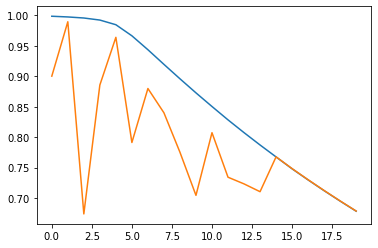

In [5]:
pyplot.plot(lam4s)
pyplot.plot(lam1s)

In [9]:
B = funcs.col_contract34(MPS.B[0],trans)

In [10]:
MPS6 = iMPS.iMPS()
MPS6.construct_from_tensor_list([B])

[9.99552678e-01 2.99051291e-02 3.56367876e-04 1.06619959e-05
 6.08659749e-07 1.81905063e-08]


AssertionError: not right canonical, error = array([[ 1.00000000e+00+0.00000000e+00j, -6.83886826e-10-1.52756911e-13j,
        -5.85629866e-06+3.97947983e-11j,  6.91200989e-04+8.50766956e-10j,
         7.06639904e-04-5.16833299e-09j, -8.23095810e-02-2.42913458e-08j],
       [-6.83886826e-10+1.52756911e-13j,  1.00000000e+00+0.00000000e+00j,
         5.91250571e-06-4.20414242e-11j,  6.77327039e-06-4.21581011e-11j,
        -7.13197476e-04+5.52797248e-09j, -8.18026164e-04+6.43437790e-09j],
       [-5.85629866e-06-3.97947983e-11j,  5.91250571e-06+4.20414242e-11j,
         9.99995018e-01+0.00000000e+00j, -1.52567490e-05-2.07727308e-11j,
         2.99489836e-04-2.14574254e-09j,  1.93436740e-03+1.50613527e-09j],
       [ 6.91200989e-04-8.50766956e-10j,  6.77327039e-06+4.21581011e-11j,
        -1.52567490e-05+2.07727308e-11j,  9.99778873e-01+0.00000000e+00j,
        -8.91642753e-05+6.73251416e-10j,  1.33718596e-02-5.40910544e-09j],
       [ 7.06639904e-04+5.16833299e-09j, -7.13197476e-04-5.52797248e-09j,
         2.99489836e-04+2.14574254e-09j, -8.91642753e-05-6.73251416e-10j,
         1.00022717e+00+0.00000000e+00j, -4.25543679e-03-2.67734634e-09j],
       [-8.23095810e-02+2.42913458e-08j, -8.18026164e-04-6.43437790e-09j,
         1.93436740e-03-1.50613527e-09j,  1.33718596e-02+5.40910544e-09j,
        -4.25543679e-03+2.67734634e-09j,  9.53504236e-01+0.00000000e+00j]])

In [20]:
MPS6.B[0]-B

ValueError: operands could not be broadcast together with shapes (6,6,4) (16,16,4) 

In [7]:
trans = MPS.transfer_matrix('right')
lam,v=(np.linalg.eig(trans.dot(np.eye(16))))
print(v[:,0])

[ 5.00000000e-01-0.j -4.20091231e-16+0.j  6.17872635e-16-0.j
  8.42528079e-16-0.j -4.41031835e-16+0.j  5.00000000e-01-0.j
  2.76042907e-15-0.j  2.47772603e-15-0.j  6.30751218e-16-0.j
  2.85931520e-15-0.j  5.00000000e-01-0.j  5.61383285e-14-0.j
  8.23043704e-16-0.j  2.48503346e-15-0.j  5.61415269e-14-0.j
  5.00000000e-01+0.j]


(4, 4, 4, 4)


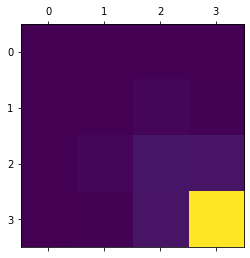

In [8]:
B = funcs.row_contract33(MPS.B[0],MPS.B[1])

trans = np.tensordot( B,B.conj(),([3,2],[3,2]) )
print(trans.shape)
M = np.trace(trans,axis1=1,axis2=3)

pyplot.matshow(np.abs(M))

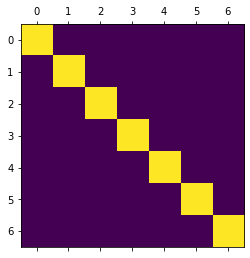

In [6]:
B = MPS.B[0]
s1= MPS.s[0]
s2= MPS.s[1]

B = funcs.row_contract32(funcs.row_contract23(np.diag(s1),B),np.linalg.inv(np.diag(s2)))

B = MPS.B[1]

pyplot.matshow(abs(np.tensordot(B,B.conj(),([1,2],[1,2]))))


In [5]:
np.tensordot( B,B.conj(),([1,2],[1,2]) )

array([[ 5.00397441e-01+0.00000000e+00j, -2.73631246e-16-2.43521972e-21j,
         9.43476775e-17-2.96461532e-21j, -2.56949030e-17+1.58818678e-21j,
         6.13690149e-17-1.39760436e-20j, -3.49280715e-17+1.06937910e-20j,
         1.04068782e-18+2.11758237e-22j,  3.86527301e-18-1.68744845e-22j,
         2.17844919e-18-1.58818678e-22j, -1.63676249e-18+1.05879118e-22j],
       [-2.73631246e-16+2.43521972e-21j,  5.00397441e-01+0.00000000e+00j,
        -1.13029435e-16+1.35525272e-20j, -7.45293119e-17-1.18584613e-20j,
         1.68301249e-16-4.48927462e-20j, -6.80109214e-17+1.79994501e-20j,
         6.57468897e-18+2.54109884e-21j,  4.20426740e-17-1.17459647e-21j,
        -8.22384754e-17+3.16710913e-20j,  2.25886269e-17-8.47032947e-22j],
       [ 9.43476775e-17+2.96461532e-21j, -1.13029435e-16-1.35525272e-20j,
         5.00397441e-01+0.00000000e+00j, -1.16341568e-16-2.03287907e-20j,
        -8.88128206e-17+1.29172524e-20j,  3.91773250e-17-3.22931311e-21j,
        -1.84239847e-17-3.38813179e-

In [4]:
transB.dot(np.ones([4,4]).reshape([16,]))

array([ 0.7476109 +0.00000000e+00j, -0.25773052+1.20639415e-04j,
        0.87429134+4.25153141e-04j,  0.43274873-2.75540872e-04j,
       -0.10858434+3.95716740e-04j, -0.24933855-4.28033191e-05j,
        0.08284082-3.76970154e-05j,  0.3478034 -1.89164053e-04j,
       -0.25773052-1.20639415e-04j,  0.59505814+0.00000000e+00j,
        0.02145115+1.65872327e-04j, -0.79376431+5.99782540e-05j,
        0.08054059+2.68279204e-04j, -0.20175774+5.41698535e-05j,
       -0.53610498-4.31395535e-05j,  0.17372996+1.68590452e-05j,
        0.87429134-4.25153141e-04j,  0.02145115-1.65872327e-04j,
        1.22834977-2.71050543e-20j,  0.09497234+3.13696228e-05j,
       -0.09948978+7.32835316e-04j, -0.47508885+3.48982732e-04j,
       -0.22682882+3.36248077e-04j,  0.59401188-6.77120162e-04j,
        0.43274873+2.75540872e-04j, -0.79376431-5.99782540e-05j,
        0.09497234-3.13696228e-05j,  1.07126604+0.00000000e+00j,
       -0.11774385-3.06937394e-04j,  0.22203265-9.58370244e-05j,
        0.69423463+9.8080

In [7]:
MPS1.chcek_canonical_site()

ValueError: operands could not be broadcast together with shapes (64,) (16,) 

In [3]:
MPS_power.E_history

[2.832485671168152,
 2.802357416643858,
 2.7943204492516944,
 2.7915104975645697,
 2.790354246224722]

In [3]:
MPS.check_canonical_unit_cell()

AssertionError: not right canonical, error = 1.4372759706370866

In [6]:
np.tensordot(MPS.B[0],MPS.B[0].conj(),([1,2],[1,2]))

array([[ 1.00000000e+00+0.00000000e+00j,  4.92382291e-16-3.57623499e-18j,
         2.54259785e-14-1.82104720e-17j, -1.94603288e-13+8.64902363e-18j,
         8.09622617e-13+9.35060041e-17j, -6.90219146e-12-5.29790843e-17j,
        -4.18977691e-11-1.89523581e-18j,  3.65203994e-12+5.22496198e-17j],
       [ 4.92382291e-16+3.57623499e-18j,  1.00000000e+00+0.00000000e+00j,
         5.28975574e-14+9.78145431e-18j,  6.36069110e-14-2.47010487e-18j,
        -2.87506275e-13-6.01127055e-17j,  4.14378723e-12+7.93417288e-18j,
         3.38743441e-11+2.55561233e-16j,  1.40404542e-11+7.13969019e-18j],
       [ 2.54259785e-14+1.82104720e-17j,  5.28975574e-14-9.78145431e-18j,
         1.00000000e+00+0.00000000e+00j, -1.20747195e-13+4.96721905e-18j,
        -4.75099579e-13-2.91311841e-17j, -6.53754203e-12-5.32822909e-18j,
        -7.02385372e-11+9.02357396e-16j,  7.95268142e-11-7.89500682e-16j],
       [-1.94603288e-13-8.64902363e-18j,  6.36069110e-14+2.47010487e-18j,
        -1.20747195e-13-4.96721905e

In [8]:
MPS.B[0].shape

(8, 8, 4)

In [19]:
print(np.abs(lam4s))
print(np.abs(lam1s))
np.abs(lam4s)

[0.99876367 0.9976089  0.99586998 0.99249913 0.98482972 0.96662354
 0.94374691 0.9197451  0.89613619 0.87294578 0.85053917 0.82871922
 0.80768523 0.78723702 0.76757344 0.74857937 0.73011745 0.71236296
 0.69517602 0.67853056 0.66240295]
[0.98752689 0.88237965 0.95780566 0.9754273  0.79177094 0.83582892
 0.79817979 0.83584257 0.83642434 0.75409041 0.76075792 0.68789944
 0.69518961 0.78723657 0.76757468 0.74857796 0.73017856 0.71241467
 0.69521978 0.67856772 0.66243424]


array([0.99876367, 0.9976089 , 0.99586998, 0.99249913, 0.98482972,
       0.96662354, 0.94374691, 0.9197451 , 0.89613619, 0.87294578,
       0.85053917, 0.82871922, 0.80768523, 0.78723702, 0.76757344,
       0.74857937, 0.73011745, 0.71236296, 0.69517602, 0.67853056,
       0.66240295])

(0.0, 1.2)

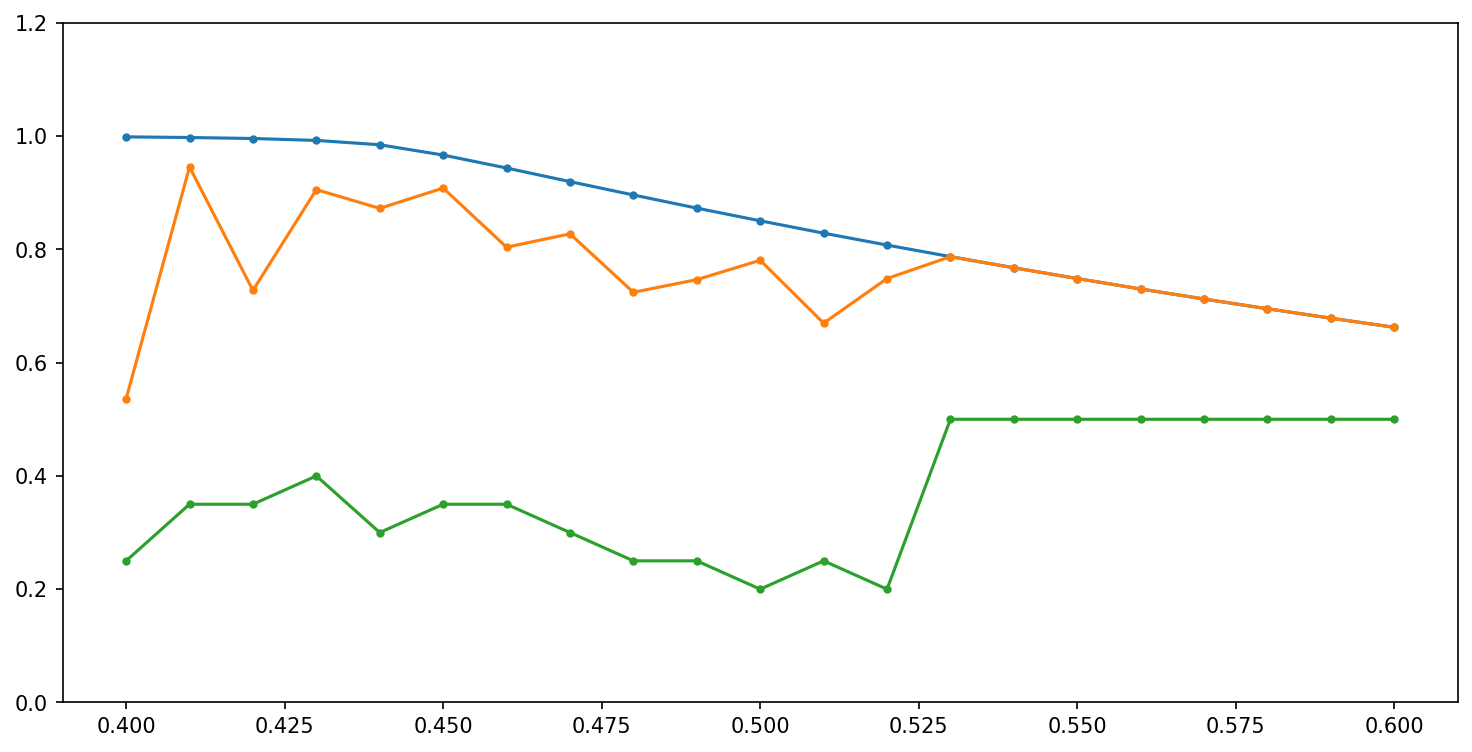

In [6]:
pyplot.figure(figsize=(12,6),dpi = 150)
#rng = np.arange(0.42,0.5,0.001)
#pyplot.plot(rng,k*rng+d)
#pyplot.plot(np.arange(0.4,0.5,0.001),lam1s,'.-',label = '$\langle X \\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),lam4s,'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.3,0.61,0.01),np.array(lam3s),'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),np.array(lam1s),'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),np.array(dims)/20,'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.ylim([0,1.2])

In [6]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.4,0.51,0.005):   
    
    h1 = h
    h2 =0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-10
    MPS.max_bond = 20
    MPS.construct_from_tensor_list([B,B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,max_bond=20)
    MPS_power.update(50)
    

    
    MPS_two_site = iMPS.MPS_twosite_update2(MPS,MPO,20)
    
    MPS_two_site.svd_threshold=1e-10
    MPS_two_site.MPS2r = copy.deepcopy(MPS)
    MPS_two_site.init_MPS2()
    
    
    MPS_two_site.init_env()
    MPS_two_site.update_MPS2(loop=100)
    
    

    
    T3 = np.zeros([1,1,4,4])
    T3[0,0,:,:] = np.kron(X,X)
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3,T3])
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    lam4s.append(lam4)
    
    
    B1 = MPS_two_site.MPS2l.B[0]
    s0 = np.diag(MPS_two_site.MPS2l.s[0])
    s1 = np.diag(MPS_two_site.MPS2l.s[1])
    B1 = funcs.row_contract23(np.linalg.inv(s0),B1)
    B1= funcs.row_contract32(B1,s1)
    
    MPS8 = iMPS.iMPS()
    MPS8.svd_threshold =1e-10
    MPS8.max_bond = 20
    MPS8.construct_from_tensor_list([B1,MPS_two_site.MPS2r.B[1]])
    
    
    
    
    for _ in range(3):
        
        MPS_two_site = iMPS.MPS_twosite_update2(MPS8,MPO,20)
    
        MPS_two_site.svd_threshold=1e-10
        MPS_two_site.MPS2r = copy.deepcopy(MPS8)
        MPS_two_site.init_MPS2()
        
        
        MPS_two_site.init_env()
        MPS_two_site.update_MPS2(loop=100)
        
        
        B1 = MPS_two_site.MPS2l.B[0]
        s0 = np.diag(MPS_two_site.MPS2l.s[0])
        s1 = np.diag(MPS_two_site.MPS2l.s[1])
        B1 = funcs.row_contract23(np.linalg.inv(s0),B1)
        B1= funcs.row_contract32(B1,s1)
        
        MPS8 = iMPS.iMPS()
        MPS8.svd_threshold =1e-10
        MPS8.max_bond = 20
        MPS8.construct_from_tensor_list([B1,MPS_two_site.MPS2r.B[1]])
        
        
    
    
    
    
    
    
    MPS9 = iMPS.iMPS()
    MPS9.svd_threshold =1e-10
    MPS9.max_bond = 20
    MPS9.construct_from_tensor_list([MPS_two_site.MPS2l.B[0],MPS_two_site.MPS2l.B[1]])
    
    
    strap4 = iMPS.strap(MPS9,MPO4,MPS8)
    lam4 = strap4.calculate_eig()
    lam1s.append(lam4)
    
    strap4 = iMPS.strap(MPS8,MPO4,MPS9)
    lam4 = strap4.calculate_eig()
    lam2s.append(lam4)
    
    dims.append(MPS_two_site.MPS2r.chi[1])
    
    strap4 = iMPS.strap(MPS8,None,MPS9)
    lam4 = strap4.calculate_eig()
    lam3s.append(lam4)
    
    
    
    
   
lam4s = np.abs(lam4s)
lam1s = np.abs(lam1s)
lam2s = np.abs(lam2s)
lam3s = np.abs(lam3s)

ValueError: shape-mismatch for sum

In [7]:
print(np.abs(lam1s))
print(np.abs(lam4s))
print(np.abs(lam3s))
#print(np.abs(lam2s))

[0.95722086 0.93095791 0.85138915 0.83748981 0.78398133 0.84635888
 0.76396874 0.85280484 0.70068823 0.86811285 0.78875606 0.83380242
 0.79975432 0.82708704 0.8253138 ]
[0.99876347 0.99802614 0.99760849 0.99693355 0.99586939 0.99421271
 0.99249759 0.9895348  0.98482275 0.97680677 0.96660465 0.95542925
 0.94371155 0.93172627 0.91969968 0.90801651]
[0.99999682 0.88471801 0.81038203 0.99768737 0.95126627 0.99295051
 0.95201288 0.99860643 0.8559717  0.96985862 0.99706138 0.84490764
 0.99446626 0.999768   0.99547991]


/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


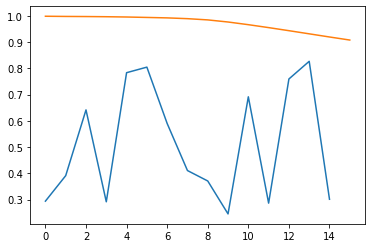

In [8]:
pyplot.plot(lam1s)
pyplot.plot(lam4s)

(-0.1, 1.2)

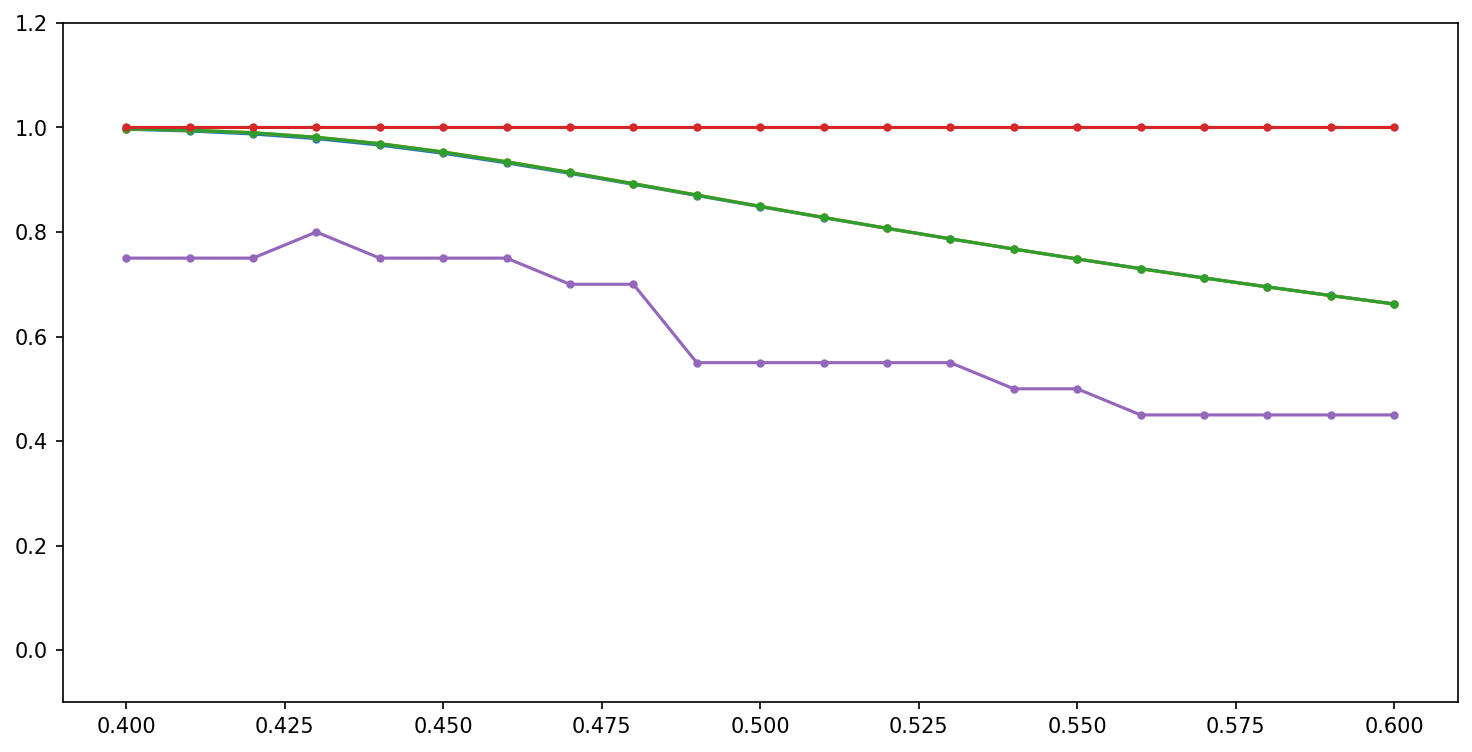

In [8]:
pyplot.figure(figsize=(12,6),dpi = 150)
#rng = np.arange(0.42,0.5,0.001)
#pyplot.plot(rng,k*rng+d)
#pyplot.plot(np.arange(0.4,0.5,0.001),lam1s,'.-',label = '$\langle X \\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),lam4s,'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.3,0.61,0.01),np.array(lam3s),'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),np.array(lam1s),'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),np.array(lam2s),'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),np.array(lam3s),'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.plot(np.arange(0.4,0.61,0.01),np.array(dims)/20,'.-',label = '$\langle \\bar{X}\\rangle$')
pyplot.ylim([-0.1,1.2])

In [23]:
np.abs(MPS_two_site.overs)

array([4.88730425, 4.81796621, 4.81567645, 4.81560655, 4.81560328,
       4.81557852, 4.81556489, 4.8155698 , 4.81559103, 4.81562546,
       4.81567101, 4.81572665, 4.81579217, 4.81586796, 4.81595484,
       4.81605401, 4.81616698, 4.81629555, 4.81644187, 4.81660841,
       4.81679803, 4.81701402, 4.81726016, 4.81754077, 4.81786078,
       4.81822581, 4.81864224, 4.81911726, 4.81965893, 4.82027623,
       4.82097897, 4.82177779, 4.82268393, 4.82370896, 4.8248643 ,
       4.82616056, 4.82760665, 4.82920864, 4.83096841, 4.83288213,
       4.83493876, 4.83711887, 4.83939383, 4.84172604, 4.84407014,
       4.84637555, 4.84859005, 4.85066413, 4.85255533, 4.85423192,
       4.85567528, 4.85688055, 4.8578556 , 4.85861859, 4.85919487,
       4.85961354, 4.8599045 , 4.86009605, 4.86021336, 4.86027759,
       4.86030575, 4.86031088, 4.86030253, 4.8602874 , 4.86026989,
       4.86025272, 4.86023739, 4.86022455, 4.86021435, 4.86020661,
       4.860201  , 4.86019711, 4.86019457, 4.86019304, 4.86019

In [11]:
strap4 = iMPS.strap(MPS_two_site.MPS2r,None,MPS_two_site.MPS2l)
lam4 = strap4.calculate_eig()
print(abs(lam4))

1.0000000000000002


In [15]:
print(MPS_two_site.MPS2l.B[0].shape)
print(MPS_two_site.MPS2l.B[1].shape)
print(MPS_two_site.MPS2r.B[0].shape)
print(MPS_two_site.MPS2r.B[1].shape)
print(MPS_two_site.MPS2l.s[1].shape)
print(MPS_two_site.MPS2r.s[1].shape)

print(MPS_two_site.MPS1l.B[0].shape)
print(MPS_two_site.MPS1l.B[1].shape)
print(MPS_two_site.MPS1r.B[0].shape)
print(MPS_two_site.MPS1r.B[1].shape)
print(MPS_two_site.MPS1l.s[1].shape)
print(MPS_two_site.MPS1r.s[1].shape)

print(MPS_two_site.transfer_matrix(0).shape)
print(MPS_two_site.transfer_matrix(1).shape)


print(MPS_two_site.El[0].shape)
print(MPS_two_site.El[1].shape)



print(MPS_two_site.Er[0].shape)
print(MPS_two_site.Er[1].shape)

(17, 18, 4)
(17, 17, 4)
(17, 17, 4)
(18, 17, 4)
(18,)
(18,)
(10, 12, 4)
(12, 10, 4)
(10, 12, 4)
(12, 10, 4)
(12,)
(12,)
(680, 680)
(816, 816)
(680,)
(864,)
(680,)
(864,)


In [86]:
MPS_two_site = iMPS.MPS_power_method_twosite_update2(MPS,MPO,20)


MPS_two_site.MPS2r = copy.deepcopy(MPS)
MPS_two_site.MPS2r.svd_threshold = 1e-6
MPS_two_site.init_MPS2()
MPS_two_site.init_env()

print(abs(MPS_two_site.overlap(0)))

s0 =np.diag(MPS_two_site.MPS1r.s[0])
s1 =np.diag(MPS_two_site.MPS1r.s[1])

T1 = funcs.row_contract33(funcs.row_contract32(MPS_two_site.MPS1l.B[0],s1),MPS_two_site.MPS1r.B[1])
T2 = funcs.row_contract33(MPS_two_site.MPS1r.B[0],MPS_two_site.MPS1r.B[1])

#print(np.linalg.norm(T1-T2))
#print(MPS_two_site.Er[0]/MPS_two_site.Er[0][0])
T3 = MPS_two_site.new_tensor(0).conj()

print(np.linalg.norm(T1-T3/T3[0,0,0,0]*T1[0,0,0,0]))

#B1_new,lam,B2_new = MPS_two_site.two_site_svd(0)
new_M = T3
new_M = np.transpose(new_M,[0,2,1,3])
w = np.shape(new_M)
            
new_M = new_M.reshape([w[0]*w[1],w[2]*w[3]])
            
U,lam,V = np.linalg.svd(new_M)
dim = np.sum(lam>1e-10)

U = U[:,:dim]
lam = lam[:dim]
V = V[:dim,:]
lam = lam/np.linalg.norm(lam)
            
B_new_left = np.reshape(U@np.diag(lam),[-1,4,dim])
B_new_left  = np.transpose(B_new_left ,[0,2,1])
#B_new_left  = funcs.row_contract23(np.linalg.inv(s0),B_new_left)
        
B_new_right = np.reshape(V,[dim,-1,4])





T4 = funcs.row_contract33(B_new_left,B_new_right)
print(np.linalg.norm(T4*T1[0,0,0,0]/T4[0,0,0,0]-T1))


3.873536065552082
0.00013216517113314168
0.00013216517113297685


In [30]:
lam

array([9.99548817e-01, 3.00183810e-02, 1.02900993e-03, 2.68688113e-05,
       1.54483247e-05, 2.73025690e-07])

In [31]:
np.diag(s1)/np.linalg.norm(s1)

array([9.99551128e-01, 2.99419135e-02, 1.01208811e-03, 8.70387501e-06])

In [33]:
B_new_right.shape

(6, 3, 4)

In [34]:
MPS_two_site.MPS1r.B[1].shape

(4, 3, 4)

In [35]:
MPS1 = iMPS.iMPS()
MPS1.construct_from_tensor_list([B_new_right[:3,:,:]])

MPS2 = iMPS.iMPS()
MPS2.construct_from_tensor_list([MPS_two_site.MPS1r.B[1][:3,:,:]])

strap = iMPS.strap(MPS1,MPO = None,MPS2=MPS1)
print(abs(strap.calculate_eig()))
strap = iMPS.strap(MPS2,MPO = None,MPS2=MPS2)
print(abs(strap.calculate_eig()))
strap = iMPS.strap(MPS1,MPO = None,MPS2=MPS2)
print(abs(strap.calculate_eig()))

0.9999999999999984
0.9999999999999989
0.9991697877893138


In [44]:
(MPS_two_site.MPS1r.B[1][:3,:,:]/MPS_two_site.MPS1r.B[1][0,0,0])

array([[[ 1.00000000e+00-0.00000000e+00j,
          2.82881131e-17+7.27131488e-30j,
         -2.24672151e-18+3.33280627e-31j,
          4.42404475e-01-3.21183455e-15j],
        [ 1.19416556e-02-5.31076001e-04j,
          1.56165288e-22-6.94507031e-24j,
         -1.24031733e-23+5.51600881e-25j,
         -2.62827187e-02+1.16885979e-03j],
        [ 1.39267821e-04+1.13748832e-04j,
         -1.73566643e-24-1.41762845e-24j,
          1.37852475e-25+1.12592827e-25j,
         -3.44950804e-04-2.81743125e-04j]],

       [[ 3.37931977e-03+3.96578393e-01j,
         -4.48820522e-17+3.07671538e-16j,
         -6.10768280e-19-7.16764080e-17j,
         -7.43504611e-03-8.72536142e-01j],
        [ 1.02222539e-02+1.92822362e-01j,
          9.86259122e-23+1.86038044e-21j,
         -2.09699670e-23-3.95556455e-22j,
          2.59239906e-02+4.89004199e-01j],
        [ 6.24347628e-03-7.77852359e-03j,
          1.67182013e-23-2.08286088e-23j,
         -3.55464519e-24+4.42860528e-24j,
          1.67370451e-02-2.

In [43]:
(B_new_right[:3,:,:]/B_new_right[0,0,0])

array([[[ 1.00000000e+00-0.00000000e+00j,
         -0.00000000e+00+2.44136546e-22j,
         -2.96476177e-20+5.87561925e-27j,
          4.42238863e-01-1.49431037e-15j],
        [ 1.21596247e-02-5.40769645e-04j,
         -1.53804943e-86-6.51999201e-87j,
         -1.92256178e-87-2.92563731e-88j,
         -2.61224913e-02+1.16173407e-03j],
        [ 6.48235243e-05+5.29454695e-05j,
         -1.53804943e-86-6.51999201e-87j,
         -1.92256178e-87-2.92563731e-88j,
         -3.04629989e-04-2.48810566e-04j]],

       [[-3.96724639e-01-0.00000000e+00j,
         -0.00000000e+00+5.14489063e-19j,
         -6.07183209e-17+1.75982100e-20j,
          8.73793467e-01-1.08589468e-14j],
        [-1.96343111e-01+8.73188088e-03j,
         -4.77059340e-80-2.05023107e-44j,
         -5.96319378e-81-9.07383276e-82j,
         -4.85261462e-01+2.15808197e-02j],
        [ 9.61954688e-03+7.85689196e-03j,
         -4.77059340e-80-2.02226576e-80j,
         -5.96319378e-81-9.07383276e-82j,
          2.15783846e-02+1.

In [11]:

MPS_two_site = iMPS.MPS_power_method_twosite_update(MPS,MPO,20)
MPS_two_site.init_MPS2()
MPS_two_site.MPS2 = copy.deepcopy(MPS)
MPS_two_site.init_env()
print(MPS_two_site.overlap())


#MPS_two_site.update_MPS2(loop=40)

(8.936012812153852-4.476419235288631e-13j)


In [ ]:

MPS_two_site.cell_svd_update(0)
M0 = MPS_two_site.MPS2.B[0]/MPS_two_site.MPS2.B[0][0,0,0]
M1 = MPS_two_site.MPS2.B[1]/MPS_two_site.MPS2.B[1][0,0,0]
#M2 = MPS_two_site.MPS2.B[2]/MPS_two_site.MPS2.B[2][0,0,0]
print(np.linalg.norm(M0-M1))
#print(np.linalg.norm(M1-M2))
#print(np.linalg.norm(M0-M2))

#print(MPS_two_site.MPS2.B[1]/MPS_two_site.MPS2.B[1][0,0,0])

#print(MPS_two_site.MPS2.B[2]/MPS_two_site.MPS2.B[2][0,0,0])

1.9198604439159797


In [ ]:
MPS6 = iMPS.iMPS()
MPS6.construct_from_tensor_list([MPS_two_site.MPS2.B[0]])

In [ ]:
np.abs(MPS_two_site.overs)

array([2.93668879, 2.77948307, 2.9964388 , 2.88521282, 3.35714752,
       3.36698475, 3.93539356, 4.06398023, 4.62826467, 4.70382865,
       5.10017941, 5.03324625, 5.2930392 , 5.14782506, 5.3554644 ,
       5.18348292, 5.37549   , 5.19514153, 5.38241036, 5.19928663,
       5.38497508, 5.20085331, 5.38596659, 5.20146537, 5.386358  ,
       5.20170819, 5.38651397, 5.20180518, 5.38657638, 5.20184403,
       5.38660139, 5.2018596 , 5.38661142, 5.20186585, 5.38661545,
       5.20186836, 5.38661706, 5.20186937, 5.38661771, 5.20186977,
       5.38661797, 5.20186994, 5.38661808, 5.20187   , 5.38661812,
       5.20187003, 5.38661814, 5.20187004, 5.38661814, 5.20187004,
       5.38661815, 5.20187004, 5.38661815, 5.20187005, 5.38661815,
       5.20187005, 5.38661815, 5.20187005, 5.38661815, 5.20187005,
       5.38661815, 5.20187005, 5.38661815, 5.20187005, 5.38661815,
       5.20187005, 5.38661815, 5.20187005, 5.38661815, 5.20187005,
       5.38661815, 5.20187005, 5.38661815, 5.20187005, 5.38661

In [ ]:
MPS3 = copy.deepcopy(MPS_two_site.MPS2)
MPS_two_site = iMPS.MPS_power_method_twosite_update(MPS3,MPO,20)
MPS_two_site.init_MPS2()
MPS_two_site.init_env()
MPS_two_site.update_MPS2(loop=40)



In [ ]:
T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron(np.eye(2),np.eye(2))
#T3[0,0,:,:] = np.kron(X,X)
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T3,T3])

In [ ]:
T3 = np.zeros([1,1,4,4])
#T3[0,0,:,:] = np.kron(np.eye(2),np.eye(2))
T3[0,0,:,:] = np.kron(X,X)
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T3,T3])
strap4 = iMPS.strap(MPS,MPO4,MPS)
lam4 = strap4.calculate_eig()
print(lam4)

print(abs(MPS_two_site.overlap(0)))

strap4 = iMPS.strap(MPS_two_site.MPS2,MPO4,MPS_two_site.MPS2)
lam4 = strap4.calculate_eig()
print(lam4)

for _ in range(3):
    MPS_two_site.cell_svd_update(0)
    print(abs(MPS_two_site.overlap(0)))
    strap4 = iMPS.strap(MPS_two_site.MPS2,MPO4,MPS_two_site.MPS2)
    lam4 = strap4.calculate_eig()
    print(lam4)

    MPS_two_site.cell_svd_update(1)
    print(abs(MPS_two_site.overlap(1)))
    strap4 = iMPS.strap(MPS_two_site.MPS2,MPO4,MPS_two_site.MPS2)
    lam4 = strap4.calculate_eig()
    print(lam4)

(0.8504805663068825-4.315251405314014e-16j)
6.3664101019588175
(0.7862684200579264-9.315523185117489e-17j)
6.3664101019588175
(0.7862684200579264+4.0871156945111357e-17j)
5.785151727248617
(0.7847752290462757+2.196359958954315e-17j)
6.366410101958815
(0.7862684200579261-2.2186345171203587e-17j)
5.7851517272704465
(0.7847752290462761-3.40245404339912e-17j)
6.366410101958817
(0.7862684200579266+3.4068701277088236e-17j)
5.7851517272707005
(0.7847752290462758-4.973232661799453e-17j)


In [ ]:
strap4 = iMPS.strap(MPS_two_site.MPS2,MPO4,MPS_two_site.MPS2)
lam4 = strap4.calculate_eig()
print(lam4)

(0.7847752290462756-7.785761955876542e-18j)


In [ ]:
s1=np.abs(MPS_two_site.MPS2.s[1])
s1

array([9.99609060e-01, 2.79593696e-02, 6.80560588e-13])

In [ ]:
np.linalg.norm(s1)

1.0